In [1]:
#import required libraried

import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# <span style="color:#000; font-size:1.2em;">Import CSV file as Pandas Dataframe and Analyze it</span>

In [2]:
data = pd.read_csv('data.csv')
print('\033[4mData Head : \033[0m\n')
print(data.head())

Data Head : 

   X         Y
0  1  3.888889
1  2  4.555556
2  3  5.222222
3  4  5.888889
4  5  6.555556


# <span style="color:#000; font-size:1.2em;">Analyze the Data</span>

In [3]:
print('\033[4mData Information : \033[0m\n')
print(data.info())

Data Information : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       300 non-null    int64  
 1   Y       300 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB
None


# <span style="color:#339999; font-size:0.75em;">Findings : </span>

<p style="color:#339999; font-size:1.1em;">
    There are no null values in both columns of the Data, and the Data Types of both the Columns are numeric, thus there is no need to change column Data types or manipulate the data for null values.
</p>

In [4]:
print('\033[4mData Summary : \033[0m\n')
print(data.describe())

Data Summary : 

                X           Y
count  300.000000  300.000000
mean   150.500000  102.215556
std     86.746758   57.842711
min      1.000000    1.888889
25%     75.750000   52.388889
50%    150.500000  102.222222
75%    225.250000  152.055556
max    300.000000  201.888889


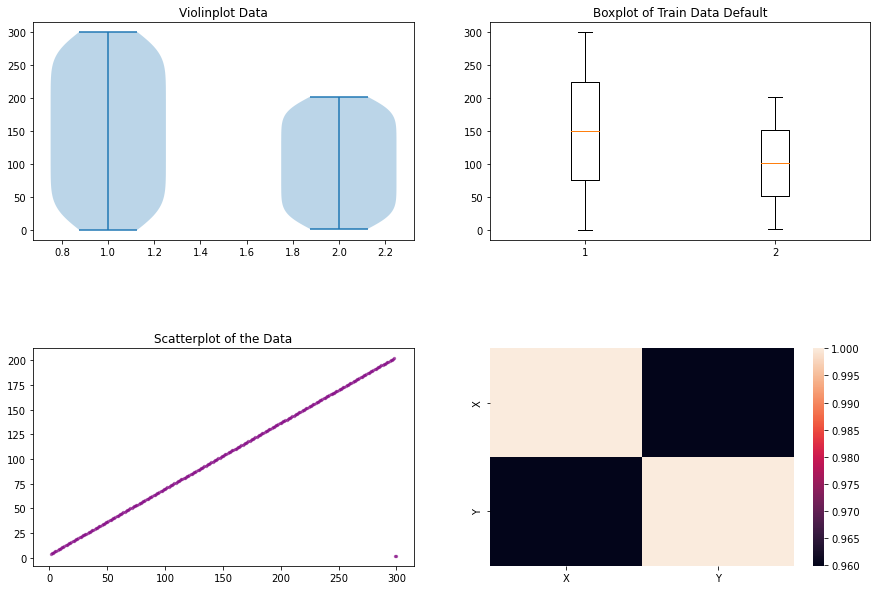

In [5]:
warnings.filterwarnings('ignore')

plt.figure
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

axs[0,0].violinplot(data)       # ViolinPlot of the dataset
axs[0,0].set_title('Violinplot Data')

axs[0,1].boxplot(data)       # BoxPlot of the Dataset
axs[0,1].set_title('Boxplot of Train Data Default')

axs[1,0].scatter(data['X'], data['Y'], c='Purple', marker=None, s=5.5, edgecolors='Purple',
               alpha=0.5)       # ScatterPlot of the Dataset
axs[1,0].set_title('Scatterplot of the Data')

axs[1,1] = sns.heatmap(data.corr(), xticklabels=data.columns,yticklabels=data.columns)
plt.subplots_adjust(hspace=0.5)
plt.show()

# <span style="color:#339999; font-size:0.75em;">Findings : </span>

<p style="color:#339999; font-size:1.1em;">
    As we can observe from the above scatterplot.heatmap and the data summary, We can see that input and output are strongly corellated, the output increases as the input increases. However there seems to be an input value 'X' that does not follow this trends as gives a very unusual output. This might be affecting the variance and standard deviation of the data as a whole but cannot be considered as an outlier. Let's keep this data as it is and create a different dataset below without this unusual value and then analyze the data.
</p>

# <span style="color:#000; font-size:1.2em;">Remove the Unusual value</span>

In [59]:
data_2 = data.copy()
data_2 = data_2[~data_2['X'].isin([299,300])]

# <span style="color:#000; font-size:0.75em;">Analyze the Data without Unusual value</span>

In [60]:
print('\033[4mData Information : \033[0m\n')
print(data_2.info())

Data Information : 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298 entries, 0 to 297
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       298 non-null    int64  
 1   Y       298 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 7.0 KB
None


In [62]:
print('\033[4mData Summary : \033[0m\n')
print(data_2.describe())

Data Summary : 

                X           Y
count  298.000000  298.000000
mean   149.500000  102.888889
std     86.169407   57.446271
min      1.000000    3.888889
25%     75.250000   53.388889
50%    149.500000  102.888889
75%    223.750000  152.388889
max    298.000000  201.888889


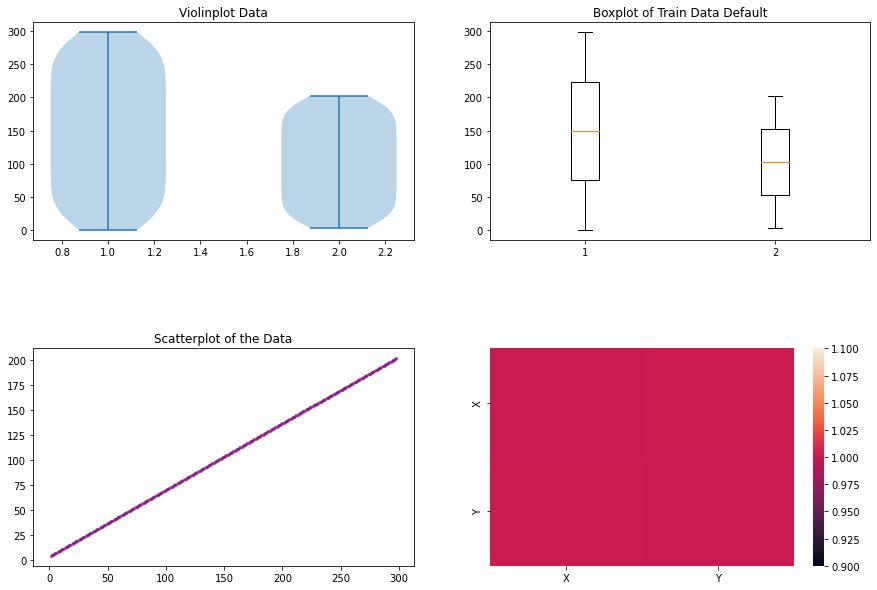

In [63]:
warnings.filterwarnings('ignore')

plt.figure
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

axs[0,0].violinplot(data_2)       # ViolinPlot of the dataset
axs[0,0].set_title('Violinplot Data')

axs[0,1].boxplot(data_2)       # BoxPlot of the Dataset
axs[0,1].set_title('Boxplot of Train Data Default')

axs[1,0].scatter(data_2['X'], data_2['Y'], c='Purple', marker=None, s=5.5, edgecolors='Purple',
               alpha=0.5)       # ScatterPlot of the Dataset
axs[1,0].set_title('Scatterplot of the Data')

axs[1,1] = sns.heatmap(data_2.corr(), xticklabels=data_2.columns,yticklabels=data_2.columns)
plt.subplots_adjust(hspace=0.5)
plt.show()

# <span style="color:#339999; font-size:0.75em;">Findings through data summary</span>

<p style="color:#339999; font-size:1.1em;">
    Removing the last 2 records from the dataset did not affect the variance and the standard deviation much and overall did not affect the dataset much. Also note that the corellation between the input and output variables has become almost 1 which can result in overfitting the data. Thus we will continue with the original dataset.
</p>

# <span style="color:#000; font-size:1.5em;">Creating Models</span>

# <span style="color:#000; font-size:1.2em;">Linear Regression</span>

In [74]:
x_train,x_test,y_train,y_test = train_test_split(data['X'],data['Y'],test_size=0.15,random_state=9)

In [75]:
X_train = x_train.values.reshape(-1,1)
X_test = x_test.values.reshape(-1,1)

In [76]:
Linear_Regression_Model_1 = linear_model.LinearRegression()

# <span style="color:#000; font-size:0.75em;">Evaluation Metrics of Fitted Linear Regression Model</span>

In [77]:
Linear_Regression_Model_1.fit(X_train,y_train)

LinearRegression()

In [78]:
Linear_Regression_fit_evaulation = {'Model 1':
                                    {'Coefficient':Linear_Regression_Model_1.coef_,
                                    'Intercept':Linear_Regression_Model_1.intercept_,
                                    'No. of Features':Linear_Regression_Model_1.n_features_in_,
                                    'R_squared score (Train)':Linear_Regression_Model_1.score(X_train,y_train),
                                    'R_squared score (Test)':Linear_Regression_Model_1.score(X_test,y_test)
                                    },
                                   }
Linear_Regression_fit_evaulation = pd.DataFrame(Linear_Regression_fit_evaulation)
Linear_Regression_fit_evaulation

,Model 1
Coefficient,[0.6362908188789017]
Intercept,6.347814
No. of Features,1
R_squared score (Test),0.997757
R_squared score (Train),0.908167


# <span style="color:#000; font-size:0.75em;">Evaluation Metrics of Prediction using Linear Regression Model</span>

In [79]:
train_y_pred = Linear_Regression_Model_1.predict(X_train)       # Prediction of Train Set
test_y_pred = Linear_Regression_Model_1.predict(X_test)       # Prediction on Test Set

In [80]:
Linear_Regression_prediction_evaulation = {'Train MSE': mean_squared_error(y_train,train_y_pred),
                                           'Test MSE' : mean_squared_error(y_test,test_y_pred),
                                           'Train RMSE': mean_squared_error(y_train,train_y_pred,squared=False),
                                           'Test RMSE' : mean_squared_error(y_test,test_y_pred,squared=False)}
Linear_Regression_prediction_evaulation = pd.DataFrame(Linear_Regression_prediction_evaulation,index=['Linear Regression Model Prediction Metrics'])
Linear_Regression_prediction_evaulation

,Train MSE,Test MSE,Train RMSE,Test RMSE
Linear Regression Model Prediction Metrics,307.456777,6.723157,17.534445,2.592905


# <span style="color:#339999; font-size:0.75em;">Findings :</span>

<p style="color:#339999; font-size:1.1em;">
    The RMSE of Test set is fairly good. And the RMSE on Train set is just average, but this is duo to the difference in the fitted line and the observed value at X values 298 and 299 which are unusually low that the rest of the values and does not follow the pattern. Thus the High RMSE of Train data can be ignored
</p>

# <span style="color:#000; font-size:0.75em;">Fitted Lined through Train Data and Predicted Data Graph</span>

Text(0.5, 1.0, 'Predicted values and Line representing them')

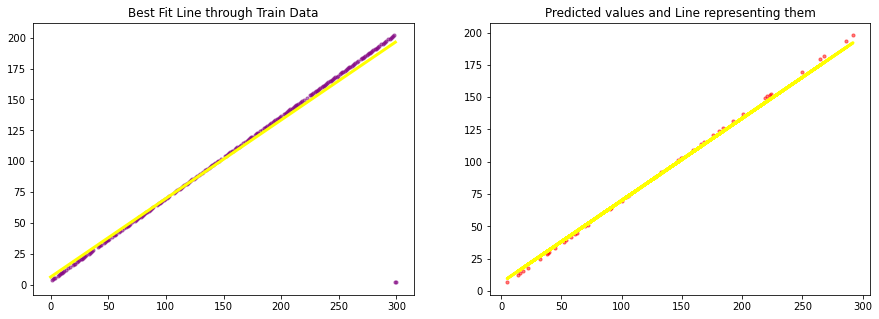

In [81]:
line = []       # The list of co-ordinates of y axis of the line

for i in range(300):       # The value of y as x increases according to the intercept and co-efficent
    line.append((0.6357046767817107*i) + (6.298307))
    
plt.figure
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axs[0].scatter(X_train, y_train, c='Purple', marker=None, s=10, edgecolors='Purple'
               ,alpha=0.5)       # ScatterPlot of The Train Data
axs[0].plot(range(300),line,c='Yellow',linewidth=3)       # Best Fit line, passing through the data (ScatterPlot)
axs[0].set_title('Best Fit Line through Train Data')

axs[1].scatter(X_test, y_test, c='Red', marker=None, s=10, edgecolors='Red'
               ,alpha=0.5)       # ScatterPlot of the Test Data 
axs[1].plot(X_test,test_y_pred,c='Yellow',linewidth=3)       # The line representing the Predicted values of Test Data
axs[1].set_title('Predicted values and Line representing them')

# <span style="color:#000; font-size:0.75em;">Predicting Random Variable</span>

In [128]:
random_integer = np.random.randint(1,45)
prediction_1 = Linear_Regression_Model_1.predict([data['X'].values.reshape(-1,1)[random_integer]])
pd.DataFrame({'X value': data['X'].values.reshape(-1,1)[random_integer],
              'Predicted Y Value' : prediction_1,
              'Observed Y Value' : data['Y'].values.reshape(-1,1)[random_integer]})

,X value,Predicted Y Value,Observed Y Value
0,9,12.074431,9.222222


# <span style="color:#339999; font-size:1.25em;">Findings:</span>
<p style="color:#339999; font-size:1.1em;">
    Observing the real and predicted values obtained using the model, it is safe to say that the model performs fairly well with good accuracy.
</p>